# Linear Regression Project - Boston House Prices

This project aims to estimate the median value of owner-occupied homes in $1000's in Boston based on the data available.

This is a copy of UCI ML housing dataset:
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

## Import Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Download the data 

In [30]:
from sklearn.datasets import load_boston
boston = load_boston()

In [31]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [32]:
# Let's get the prescription of the data
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Creating DataFrames

In [33]:
dn, dt =pd.DataFrame(boston['data']), pd.DataFrame(boston['target'])

In [34]:
dn.columns = boston['feature_names']
dt.columns = ['MEDV']

In [35]:
df = pd.concat([dn,dt], axis = 1)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


## Splitting our Data
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the MEDV column.

In [36]:
from sklearn.model_selection import train_test_split

X, y = df[dn.columns], df[dt.columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [64]:
train = pd.concat([X_train,y_train], axis=1)

## Exploratory Data Analysis

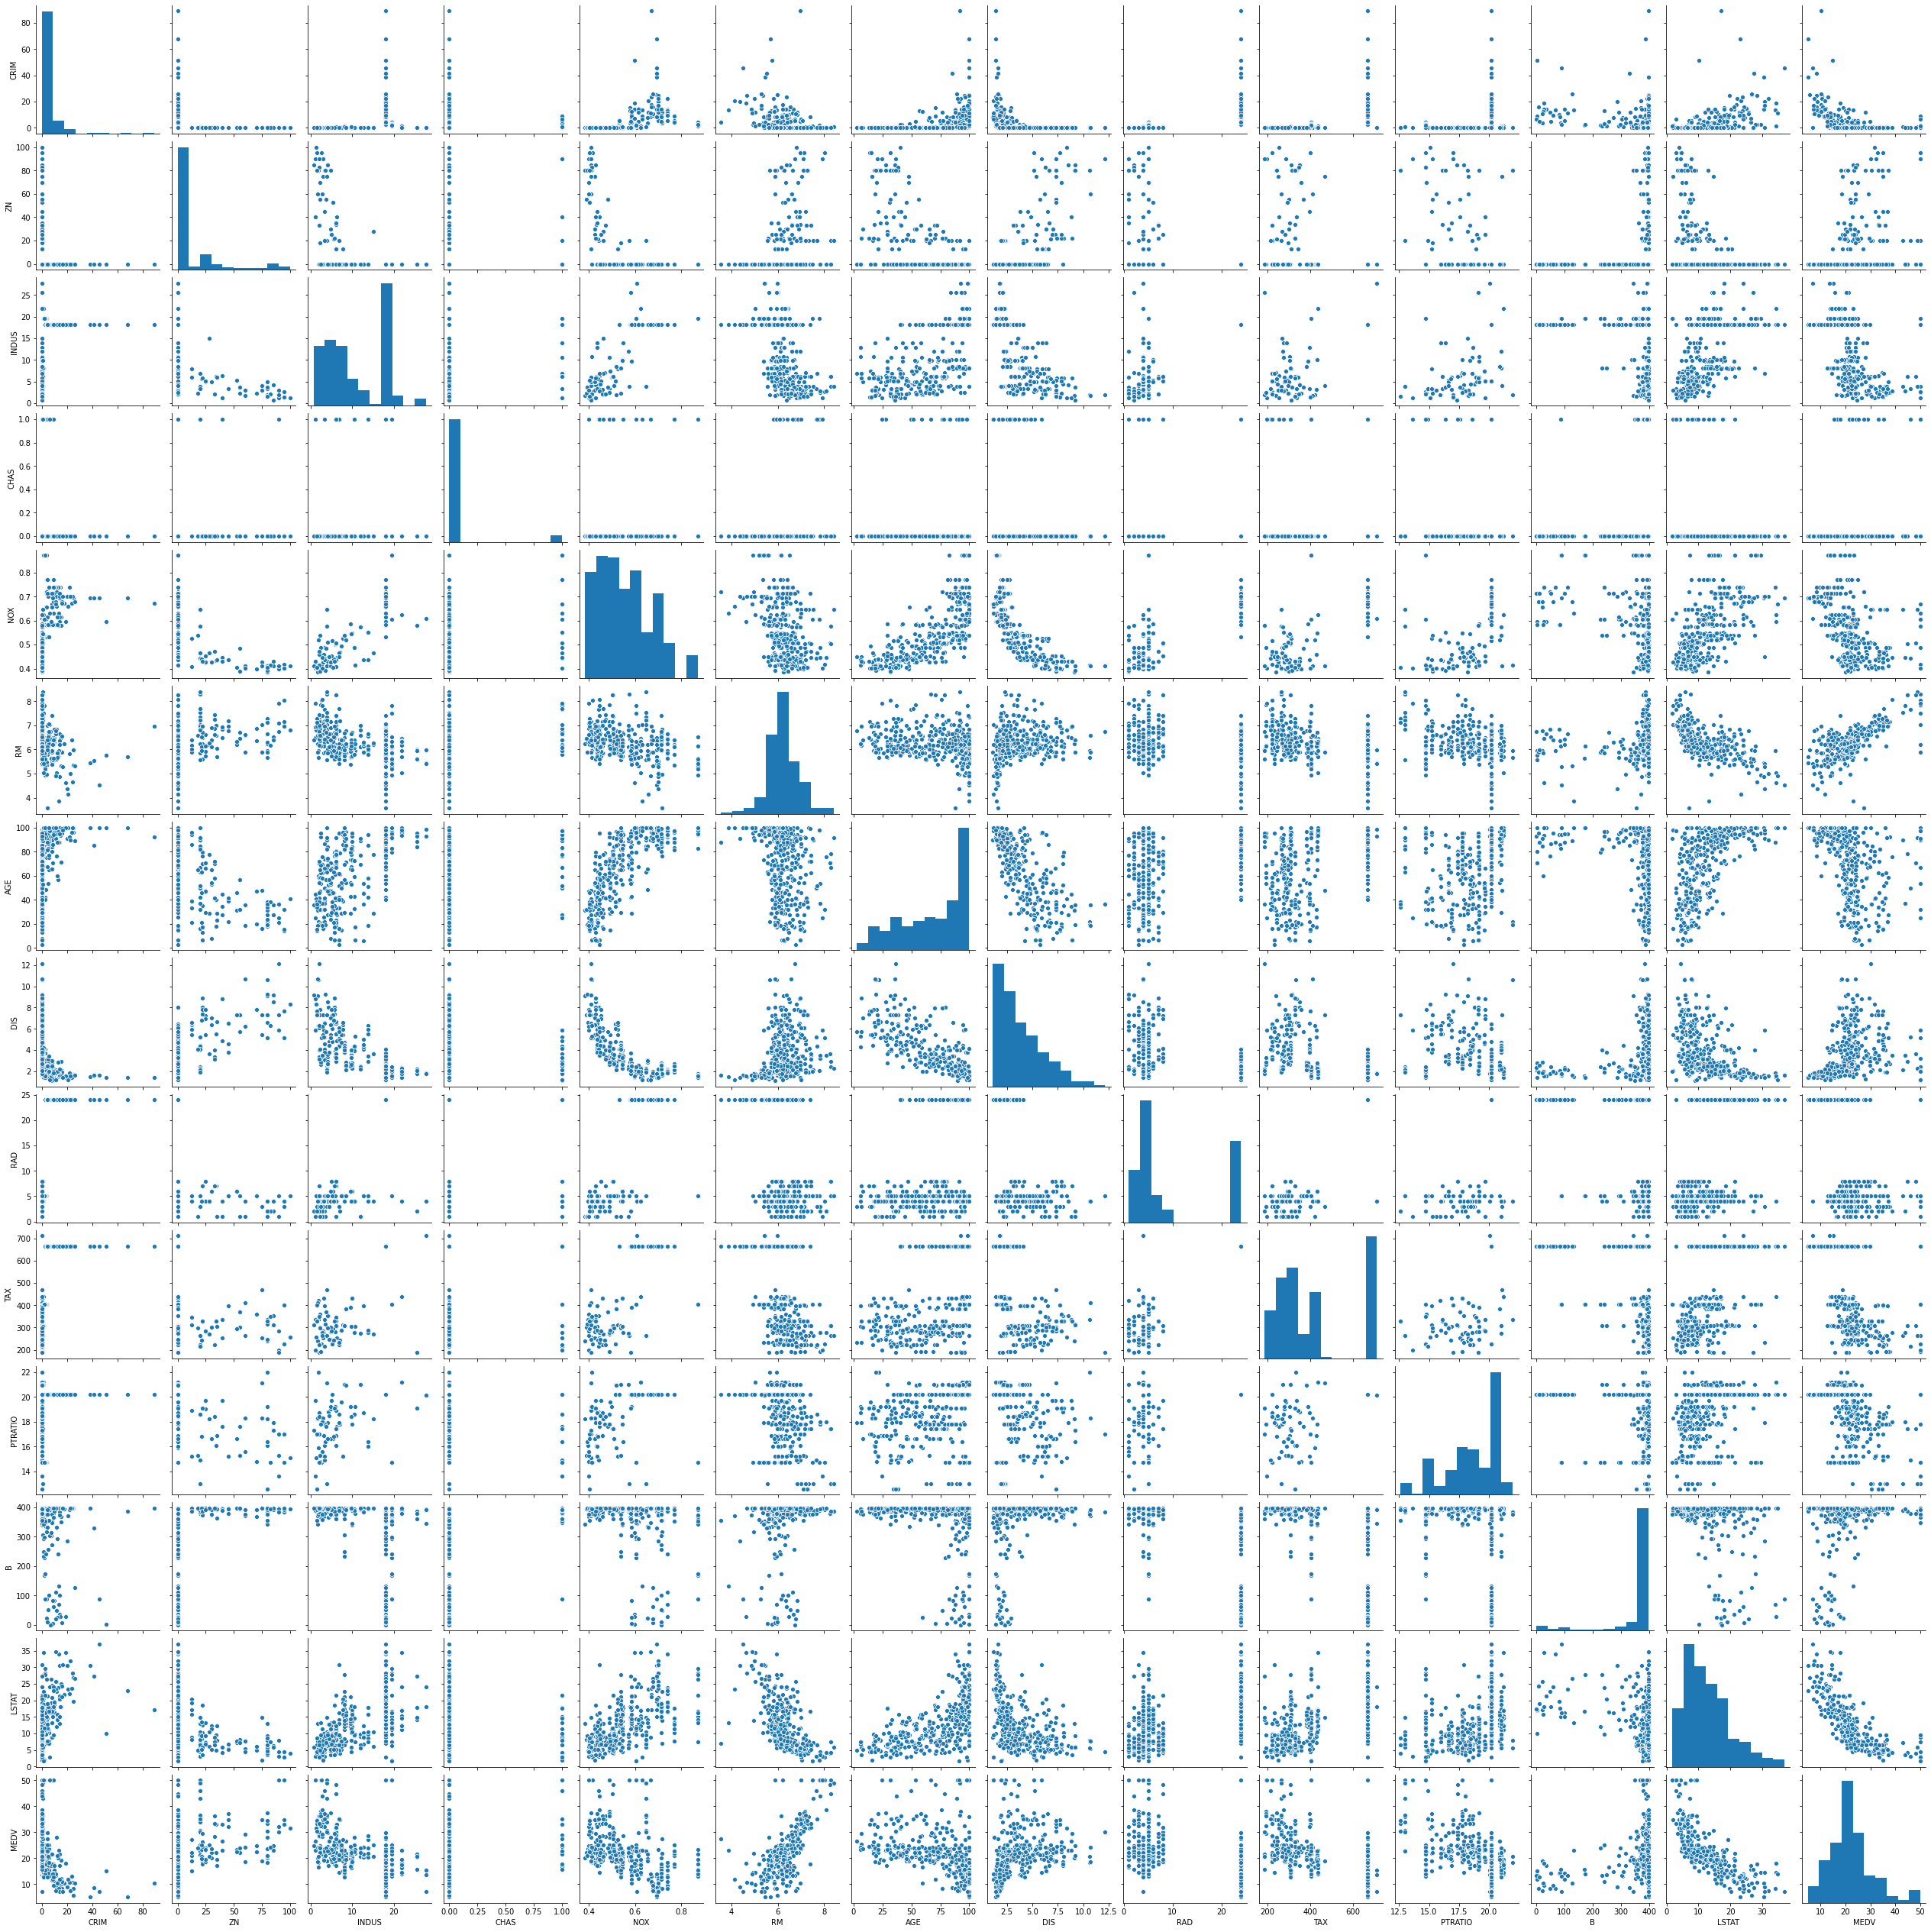

In [65]:
sns.pairplot(train)

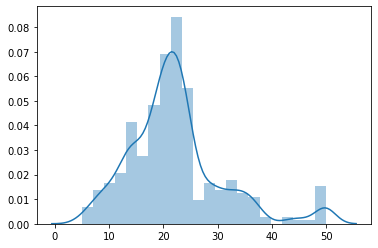

In [66]:
sns.distplot(y_train)

In [67]:
train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.198556,0.422532,-0.034480,0.424561,-0.262879,0.364598,-0.386368,0.624516,0.583944,0.293017,-0.308635,0.489989,-0.417754
ZN,-0.198556,1.000000,-0.518953,-0.014327,-0.502014,0.290738,-0.545264,0.675604,-0.313116,-0.299391,-0.372910,0.166866,-0.384995,0.326655
INDUS,0.422532,-0.518953,1.000000,0.030035,0.764781,-0.421561,0.644556,-0.697085,0.627064,0.739462,0.387537,-0.368098,0.616174,-0.499954
CHAS,-0.034480,-0.014327,0.030035,1.000000,0.072379,0.144754,0.051916,-0.069410,0.046628,0.002997,-0.076251,0.026275,-0.082844,0.236987
NOX,0.424561,-0.502014,0.764781,0.072379,1.000000,-0.324617,0.738782,-0.765789,0.621731,0.667443,0.190575,-0.384912,0.604236,-0.426119
RM,-0.262879,0.290738,-0.421561,0.144754,-0.324617,1.000000,-0.240196,0.206922,-0.283420,-0.355657,-0.351262,0.156136,-0.608683,0.682393
AGE,0.364598,-0.545264,0.644556,0.051916,0.738782,-0.240196,1.000000,-0.758546,0.470189,0.511321,0.242961,-0.278108,0.613173,-0.371583
DIS,-0.386368,0.675604,-0.697085,-0.069410,-0.765789,0.206922,-0.758546,1.000000,-0.503050,-0.528358,-0.223181,0.285376,-0.504182,0.237543
RAD,0.624516,-0.313116,0.627064,0.046628,0.621731,-0.283420,0.470189,-0.503050,1.000000,0.913984,0.470209,-0.433158,0.523658,-0.407692
TAX,0.583944,-0.299391,0.739462,0.002997,0.667443,-0.355657,0.511321,-0.528358,0.913984,1.000000,0.464819,-0.430491,0.575466,-0.497410


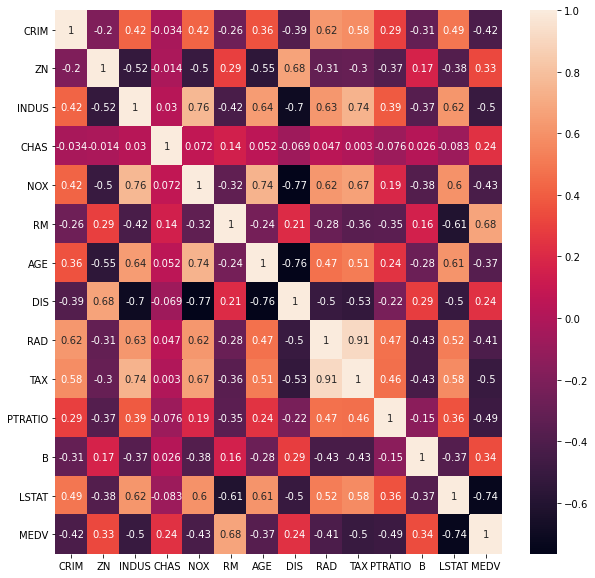

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True)

## Creating and Trainning Model

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lm = LinearRegression()

In [71]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [72]:
# Value of y intercept
lm.intercept_

array([36.35704138])

In [73]:
coeff_df = pd.DataFrame(lm.coef_.T,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.122570
ZN,0.055678
INDUS,-0.008834
CHAS,4.693448
NOX,-14.435783
RM,3.280080
AGE,-0.003448
DIS,-1.552144
RAD,0.326250
TAX,-0.014067


#### Predictions from our Model

In [74]:
predictions = lm.predict(X_test)

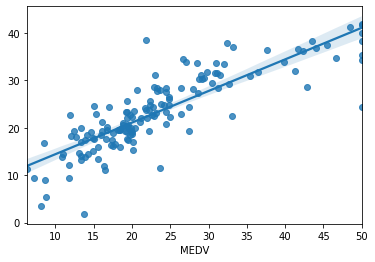

In [75]:
sns.regplot(y_test,predictions)

#### Residual Histagram

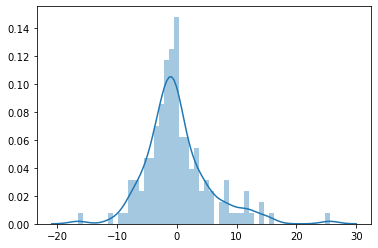

In [76]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

In [77]:
from sklearn import metrics

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.8590055923707407
MSE: 30.053993307124127
RMSE: 5.482152251362974
